In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df = df.set_index('hn')
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.isnull().sum()/1723*100

age            0.000000
parity         0.000000
hiv            0.232153
menopaus       0.058038
disease        0.000000
surgery        0.000000
conization     0.290192
OPDsize        0.986651
appearance     5.861869
stage          1.392919
pchemo         0.058038
Wardsize       8.415554
finalhisto     0.580383
nodeyiel       0.696460
RHlvsi        21.242020
depth         28.380731
size           6.616367
utmet          5.687754
vgmargin       5.571677
vgmet          5.629716
pelvicme       0.058038
pmmet          5.455601
adnmet         0.406268
dtype: float64

In [34]:
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)
df_clean_column.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
stage          24
pchemo          1
finalhisto     10
size          114
utmet          98
vgmet          97
pmmet          94
dtype: int64

dropna คือ colไหนมีค่าว่างลบทั้งcol

In [35]:
df_clean = df_clean_column.dropna(axis = 0)

In [36]:
df_clean.isnull().sum()

age           0
parity        0
hiv           0
menopaus      0
disease       0
surgery       0
conization    0
OPDsize       0
stage         0
pchemo        0
finalhisto    0
size          0
utmet         0
vgmet         0
pmmet         0
dtype: int64

In [37]:
df_clean.shape

(1555, 15)

In [38]:
pel_class = np.unique(df_clean['pmmet'])
pel_class

array([0., 1.])

In [39]:
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value

[1278, 277]

# ***Separate pelviceme dataset into data (X) and label (y)***

In [40]:
y = df_clean['pmmet'].values
X = df_clean.drop(['pmmet'],axis = 1).values

test_size 0.2 คือ test20% train80%

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1,2,4,8,16]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1}
10CV accuracy : 83.36193548387098


Test Accuracy

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 84.56591639871382


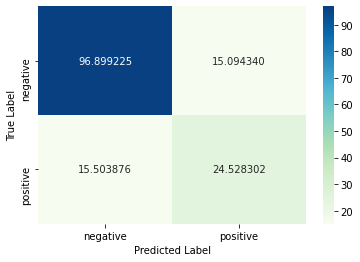

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

The precision is the ratio tp / (tp + fp). The precision is the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn). The recall is the ability of the classifier to find all the positive samples.

The F score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_true.

In [46]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.86      0.97      0.91       258
    positive       0.62      0.25      0.35        53

    accuracy                           0.85       311
   macro avg       0.74      0.61      0.63       311
weighted avg       0.82      0.85      0.82       311



# Homework

# Support Vector Machine

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [0.1,0.5,1],
    'gamma' : [0.25,0.5,1,2,4,8]
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1, 'gamma': 0.5}
10CV accuracy : 83.44387096774193


In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)*100

83.27974276527331

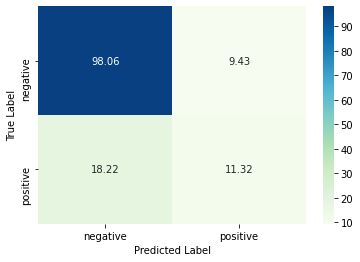

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [50]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.84      0.98      0.91       258
    positive       0.55      0.11      0.19        53

    accuracy                           0.83       311
   macro avg       0.69      0.55      0.55       311
weighted avg       0.79      0.83      0.78       311

